          day  count
0  2023-11-01    102
1  2023-11-02    129
2  2023-11-03    189
3  2023-11-04     74
4  2023-11-14    134
5  2023-11-15    152
6  2023-11-16    134
7  2023-11-17    121
8  2023-11-18     68
9  2023-11-19     52
10 2023-11-20     73
11 2023-11-21     93
12 2023-11-22    100
13 2023-11-23     48
14 2023-11-24     29
15 2023-11-25     35
16 2023-11-26     35
17 2023-11-27     89
18 2023-11-28    127
19 2023-11-29     99
20 2023-11-30     70


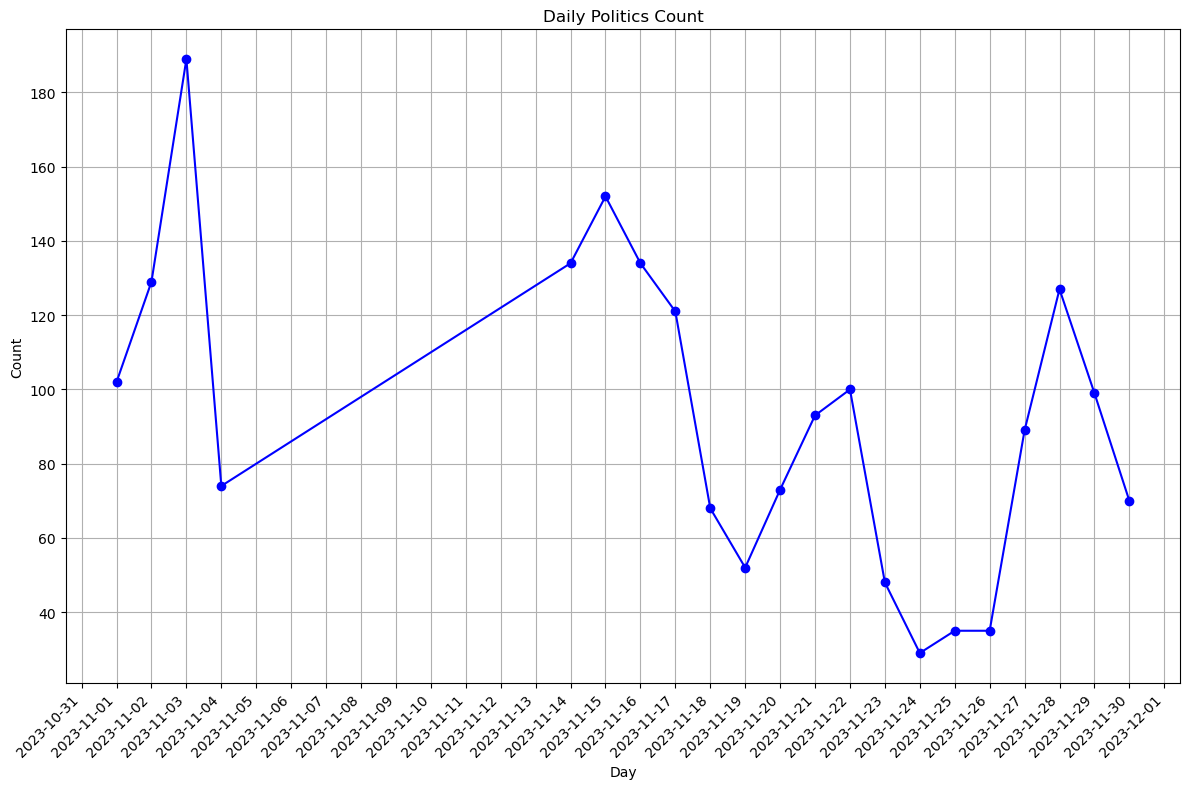

In [3]:
import datetime as dt
from datetime import datetime, timedelta
import json
import pandas as pd
import pymongo
from pymongo import MongoClient
from pandas.io.json import json_normalize
import math
from numpy import nan
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


with open('config.json', 'r') as file:
    config_data = json.load(file)

mongo_hostname = config_data['MONGO_HOSTNAME']
mongo_portnumber = config_data['MONGO_PORTNUMBER']


mongo_client = pymongo.MongoClient(mongo_hostname, mongo_portnumber)
db = mongo_client['movieData']

politics_collection = db['politics']


data = politics_collection.find({'reddit_date': {'$exists': True}})



df = pd.DataFrame(data)
df = df[~df['reddit_date'].apply(lambda x: isinstance(x, (int, float)))]
df['reddit_date'] = pd.to_datetime(df['reddit_date'])
df['day'] = df['reddit_date'].dt.floor('D')
grouped_df = df.groupby('day').size().reset_index(name='count')
grouped_df =  grouped_df[grouped_df['day'].dt.year != 1970]
grouped_df =  grouped_df[grouped_df['day'].dt.month != 10]
grouped_df =  grouped_df[grouped_df['day'].dt.month != 12]

print(grouped_df)

plt.figure(figsize=(12, 8))
plt.plot(grouped_df['day'], grouped_df['count'], marker='o', linestyle='-', color='b')

plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.gcf().autofmt_xdate()

# Formatting
plt.title('Daily Politics Count')
plt.xlabel('Day')
plt.ylabel('Count')
plt.grid(True)
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()